In [113]:
#import libraries and packages
import numpy as np
import pandas as pd
import re
import csv
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#view harry potter 1 book
harrypotter1 = pd.read_csv('harrypotter1.csv',encoding= 'unicode_escape',sep = ';')
harrypotter1.head()


,Character,Sentence
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.


In [3]:
#view harry potter 2 book
harrypotter2 = pd.read_csv('harrypotter2.csv',encoding= 'unicode_escape',sep = ';')
harrypotter2.head()


,Character,Sentence
0,HARRY,"I cant let you out, Hedwig."
1,HARRY,Im not allowed to use magic outside of school.
2,HARRY,"Besides, if Uncle Vernon"
3,VERNON,Harry Potter!
4,HARRY,Now youve done it.


In [4]:
#view harry potter 3 book
harrypotter3 = pd.read_csv('harrypotter3.csv',encoding= 'unicode_escape',sep = ';')
harrypotter3.head()


,Character,Sentence
0,HARRY,Lumos Maxima...
1,HARRY,Lumos Maxima...
2,HARRY,Lumos Maxima...
3,HARRY,Lumos... MAXIMA!
4,AUNT PETUNIA,Harry! Harry!


In [5]:
#view harry potter general
harrypotter4 = pd.read_csv('harrypotter.csv',encoding= 'unicode_escape',sep = ';')
harrypotter4.head()

,Character,Sentence
0,Ginny,Think you're in love Ron?
1,Ginny,I'm not wearing that it's ghastly.
2,HERMIONE,Harry!
3,HERMIONE,Are you alright?
4,HERMIONE,Just now. You?


In [6]:
#create a new datasets with all the books from 1-3
harrypotter_mix = harrypotter1.append(harrypotter2)
harrypotter_mix1 = harrypotter_mix.append(harrypotter3)
harrypotter = harrypotter_mix1.append(harrypotter4)
harrypotter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Character  5015 non-null   object
 1   Sentence   5015 non-null   object
dtypes: object(2)
memory usage: 117.5+ KB


In [7]:
#View the file
harrypotter.head()

,Character,Sentence
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.


In [8]:
harrypotter = harrypotter.rename(columns={'Sentence':'Dialogue'})
harrypotter.head()

,Character,Dialogue
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.


In [9]:
# Remove strings and other characters in the end with ...
harrypotter['Character'] = harrypotter['Character'].str.strip()
harrypotter['Dialogue'] = harrypotter['Dialogue'].str.strip()
harrypotter['Dialogue'] = harrypotter['Dialogue'].replace('\n', ' ')
harrypotter['Dialogue'] = harrypotter['Dialogue'].replace('  ', ' ')
harrypotter['Dialogue'] = harrypotter['Dialogue'].replace('\ ', ' ')
harrypotter

,Character,Dialogue
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.
...,...,...
85,Cedric,Where are we?
86,Cedric,It's a portkey. Harry the cup is a portkey
87,Cedric,What is it?
88,Cedric,Who are you? What do you want?


In [10]:
#remove unnecessary rows which does not need profile evaluation
#remove the characters with number in the name
harrypotter = harrypotter[~harrypotter['Character'].str.contains('\d')]
#remove the characters with special characters
harrypotter = harrypotter.loc[harrypotter['Character'].str.contains(r'[^\x00-\x7F]+') == False]
#change the double repeat of name
harrypotter['Character'] = harrypotter['Character'].replace({'Vernon':'UNCLE VERNON','VERNON':'UNCLE VERNON',
                                                             'Hermoine':'HERMIONE','WOOD':'OLIVER WOOD','Oliver':'OLIVER WOOD','OIiver':'OLIVER WOOD'})
#remove characters with general name
exclude = ['Snake','Someone','Man','Witch','Boy','Trainmaster','Whispers', 'Sorting Hat','Girl', 'Man in paint',
       'Fat Lady',  'Class','All','Ron and Harry','Gryffindors','Crowd', 'MR. BORGIN','MAN', 'PHOTOGRAPHER',  'TRAINMASTER',
       'HARRY AND RON','CLASS', 'CORNISH PIXIES','VOICE','BOY','PICTURE','SLYTHERINS','DIARY','HARRY-RON-HERMIONE',  'STUDENT',
        'SHRUNKEN HEAD','VENDOR','HOUSEKEEPER','BEM','TEACHER', 'CROWD', 'FRED & GEORGE','Woman','Students']
for char in exclude:
  harrypotter = harrypotter[harrypotter.Character != char]
harrypotter

,Character,Dialogue
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.
...,...,...
85,Cedric,Where are we?
86,Cedric,It's a portkey. Harry the cup is a portkey
87,Cedric,What is it?
88,Cedric,Who are you? What do you want?


In [11]:
#check the name list
char_list = harrypotter.Character.unique()
char_list

array(['Dumbledore', 'McGonagall', 'Hagrid', 'Petunia', 'Dudley',
       'UNCLE VERNON', 'Harry', 'Quirrell', 'Goblin', 'Griphook',
       'Ollivander', 'Mrs. Weasley', 'George', 'Fred', 'Ginny', 'Ron',
       'Hermione', 'Neville', 'Malfoy', 'Seamus', 'Percy', 'Sir Nicholas',
       'Snape', 'Dean', 'Madam Hooch', 'Filch', 'OLIVER WOOD', 'Flitwick',
       'Draco', 'Lee Jordan', 'Flint', 'Lee  Jordan', 'HERMIONE',
       'Firenze', 'Voldemort', 'HARRY', 'PETUNIA', 'DUDLEY',
       'AUNT PETUNIA', 'DOBBY', 'RON', 'GEORGE', 'FRED', 'MRS. WEASLEY',
       'GINNY', 'MR. WEASLEY', 'FRED, GEORGE, RON',
       'FRED, GEORGE, RON, HARRY', 'PERCY', 'LUCIUS MALFOY', 'DRACO',
       'WITCH', 'HAGRID', 'LOCKHART', 'FILCH', 'SNAPE', 'DUMBLEDORE',
       'MCGONAGALL', 'PROFESSOR SPROUT', 'SEAMUS', 'PENELOPE CLEARWATER',
       'SIR NICHOLAS', 'COLIN', 'DEAN', 'NEVILLE', 'GILDEROY LOCKHART',
       'FLINT', 'LEE JORDAN', 'MADAM POMFREY', 'MOANING MYRTLE',
       'JUSTIN FINCH-FLETCHLEY', 'SORTING HA

In [12]:
#change all names into same case so that the joining will be uniform
harrypotter['Character'] =  harrypotter['Character'].str.upper()
harrypotter

,Character,Dialogue
0,DUMBLEDORE,"I should've known that you would be here, Prof..."
1,MCGONAGALL,"Good evening, Professor Dumbledore."
2,MCGONAGALL,"Are the rumors true, Albus?"
3,DUMBLEDORE,"I'm afraid so, professor."
4,DUMBLEDORE,The good and the bad.
...,...,...
85,CEDRIC,Where are we?
86,CEDRIC,It's a portkey. Harry the cup is a portkey
87,CEDRIC,What is it?
88,CEDRIC,Who are you? What do you want?


In [13]:
#check the name list
char_list = harrypotter.Character.unique()
char_list

array(['DUMBLEDORE', 'MCGONAGALL', 'HAGRID', 'PETUNIA', 'DUDLEY',
       'UNCLE VERNON', 'HARRY', 'QUIRRELL', 'GOBLIN', 'GRIPHOOK',
       'OLLIVANDER', 'MRS. WEASLEY', 'GEORGE', 'FRED', 'GINNY', 'RON',
       'HERMIONE', 'NEVILLE', 'MALFOY', 'SEAMUS', 'PERCY', 'SIR NICHOLAS',
       'SNAPE', 'DEAN', 'MADAM HOOCH', 'FILCH', 'OLIVER WOOD', 'FLITWICK',
       'DRACO', 'LEE JORDAN', 'FLINT', 'LEE  JORDAN', 'FIRENZE',
       'VOLDEMORT', 'AUNT PETUNIA', 'DOBBY', 'MR. WEASLEY',
       'FRED, GEORGE, RON', 'FRED, GEORGE, RON, HARRY', 'LUCIUS MALFOY',
       'WITCH', 'LOCKHART', 'PROFESSOR SPROUT', 'PENELOPE CLEARWATER',
       'COLIN', 'GILDEROY LOCKHART', 'MADAM POMFREY', 'MOANING MYRTLE',
       'JUSTIN FINCH-FLETCHLEY', 'SORTING HAT', 'CRABBE', 'TOM RIDDLE',
       'FUDGE', 'ARAGOG', 'AUNT MARGE', 'STAN SHUNPIKE', 'TOM', 'LUPIN',
       'FAT LADY', 'TRELAWNEY', 'PANSY PARKINSON', 'PARVATI',
       'MADAM ROSMERTA', 'GOYLE', 'SIRIUS', 'PETTIGREW', 'LUNA', 'CEDRIC'],
      dtype=object)

In [14]:
#creating separate dataframe for each character
dialogue_list = []
#creates separate df for each char
for char in char_list:
       char_df = harrypotter[harrypotter['Character'] == char]
       dialogue_list.append((' '.join(char_df['Dialogue'].values)))
dialogue_list
dialogue_df = pd.DataFrame(dialogue_list,columns = ['Dialogue'])
dialogue_df['Character'] = harrypotter['Character'].unique()


,Dialogue,Character
0,"I should've known that you would be here, Prof...",DUMBLEDORE
1,"Good evening, Professor Dumbledore. Are the ru...",MCGONAGALL
2,"Professor Dumbledore, sir. Professor McGonagal...",HAGRID
3,"Up. Get up! Now! Here he comes, the birthday b...",PETUNIA
4,"Wake up, cousin! We're going to the zoo! How m...",DUDLEY
...,...,...
63,"Look who's here. Malfoy, are you okay? Let's g...",GOYLE
64,No. Only one will die tonight. Are you going t...,SIRIUS
65,Remus? Sirius. My old friends! Harry! Look at ...,PETTIGREW
66,Quibbler...? Quibbler...? Theres an article o...,LUNA


In [29]:
#check for word counts,if less than 100 drop the column because the min words required is 100 in ibm
dialogue_df['count'] = dialogue_df['Dialogue'].str.split().str.len()
dialogue_df_filter = dialogue_df[dialogue_df['count'] > 100]
dialogue_list = dialogue_df['Dialogue'].tolist()
dialogue_df_filter.shape
dialogue_df_filter
dialogue_harry = dialogue_df_filter.to_csv('harry_filter.csv',sep = ';')

In [16]:
#personality insights connection through IBM Watson
from ibm_watson import PersonalityInsightsV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('H9byckt66ryK4Rs3deRp0mUMaNvInnzhyMNXBlkYEaFd')
personality_insights = PersonalityInsightsV3(
    version='2020-06-16',
    authenticator=authenticator
)

personality_insights.set_service_url('https://api.eu-gb.personality-insights.watson.cloud.ibm.com/instances/267c8b06-4d40-4b7b-b67b-9632586885a8')

personality_insights.set_disable_ssl_verification(True)

In [18]:
my_list = []
for dialogue in dialogue_list:
    text = dialogue
    response = personality_insights.profile(text,accept='text/csv',content_type='text/plain', csv_headers=True).get_result()
    profile = response.content
    cr = csv.reader(profile.decode('utf-8').splitlines())
    my_list.append(list(cr))

C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthe

C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\sudis\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.eu-gb.personality-insights.watson.cloud.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthe

In [32]:
harry_per = pd.DataFrame(my_list) 
harry_per['Character'] = dialogue_df_filter['Character']
harry_per.shape
harry_per.head(3)

,0,1,Character
0,"[big5_agreeableness, facet_altruism, facet_coo...","[0.7097746056516593, 0.9334209033534646, 0.833...",DUMBLEDORE
1,"[big5_agreeableness, facet_altruism, facet_coo...","[0.7449885780296414, 0.7661518418385902, 0.643...",MCGONAGALL
2,"[big5_agreeableness, facet_altruism, facet_coo...","[0.8210867737327995, 0.416395591922679, 0.4822...",HAGRID


In [39]:
#writing down in a file to make changes
big5_harry = harry_per.to_csv('harry_per.csv',sep = ';')

In [101]:
harrypotter_links = pd.read_csv('harry_per_links.csv',encoding= 'unicode_escape',sep = ';')
harrypotter_links

,Character,House,BloodStatus,big5_agreeableness,facet_altruism,facet_cooperation,facet_modesty,facet_morality,facet_sympathy,facet_trust,...,need_challenge_significant,need_closeness_significant,need_curiosity_significant,need_excitement_significant,need_harmony_significant,value_conservation_significant,value_hedonism_significant,value_openness_to_change_significant,value_self_enhancement_significant,value_self_transcendence_significant
0,DUMBLEDORE,Gryffindor,Half-blood,0.709775,0.933421,0.833998,0.916899,0.967325,0.994022,0.457962,...,True,True,True,True,True,True,True,True,True,True
1,MCGONAGALL,Gryffindor,Half-blood,0.744989,0.766152,0.643391,0.924204,0.898644,0.976455,0.335448,...,True,True,True,True,True,True,True,True,True,True
2,HAGRID,Gryffindor,Part-Human (Half-giant),0.821087,0.416396,0.482206,0.970600,0.708739,0.564477,0.096732,...,True,True,True,True,True,True,True,True,True,True
3,HARRY,Gryffindor,Half-blood,0.751962,0.621855,0.650376,0.991171,0.911099,0.860385,0.073207,...,True,True,True,True,True,True,True,True,True,True
4,QUIRRELL,Ravenclaw,Half-blood,0.676655,0.630506,0.713518,0.999424,0.951103,0.930160,0.056530,...,True,True,True,True,True,True,True,True,True,True
5,OLLIVANDER,Ravenclaw,Half-blood,0.680243,0.809294,0.989387,0.991797,0.995530,0.953495,0.118134,...,True,True,True,True,True,True,True,True,True,True
6,MRS. WEASLEY,Gryffindor,Pure-blood,0.996888,0.611578,0.960647,0.993338,0.991447,0.625759,0.577721,...,True,True,True,True,True,True,True,True,True,True
7,GEORGE,Gryffindor,Pure-blood,0.491754,0.274781,0.720602,0.827828,0.939492,0.287112,0.216710,...,True,True,True,True,True,True,True,True,True,True
8,FRED,Gryffindor,Pure-blood,0.718205,0.354112,0.431428,0.906352,0.694787,0.388073,0.085412,...,True,True,True,True,True,True,True,True,True,True
9,GINNY,Gryffindor,Pure-blood,0.679205,0.380192,0.117104,0.948493,0.163696,0.794691,0.012605,...,True,True,True,True,True,True,True,True,True,True


In [106]:
harrypotter_links.dtypes

Character                                object
House                                    object
BloodStatus                              object
big5_agreeableness                      float64
big5_conscientiousness                  float64
                                         ...   
value_conservation_significant             bool
value_hedonism_significant                 bool
value_openness_to_change_significant       bool
value_self_enhancement_significant         bool
value_self_transcendence_significant       bool
Length: 134, dtype: object

In [111]:
#adding all values of big5 to get average of big5
harrypotter_links['big5'] = harrypotter_links.loc[:,['big5_agreeableness','big5_openness','big5_neuroticism','big5_conscientiousness','big5_extraversion',]].mean(axis=1)
harrypotter_links['big5']

0     0.625439
1     0.716050
2     0.476061
3     0.433547
4     0.339092
5     0.467134
6     0.794129
7     0.402670
8     0.373647
9     0.447007
10    0.348353
11    0.314267
12    0.415649
13    0.434769
14    0.135726
15    0.845369
16    0.522439
17    0.237752
18    0.405973
19    0.432084
20    0.583635
21    0.726170
22    0.718293
23    0.734217
24    0.456472
25    0.489515
26    0.312337
27    0.526733
28    0.772323
29    0.533707
30    0.711230
31    0.489273
32    0.762953
Name: big5, dtype: float64

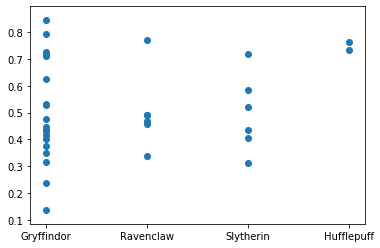

In [117]:
plt.scatter(harrypotter_links['House'], harrypotter_links['big5'])

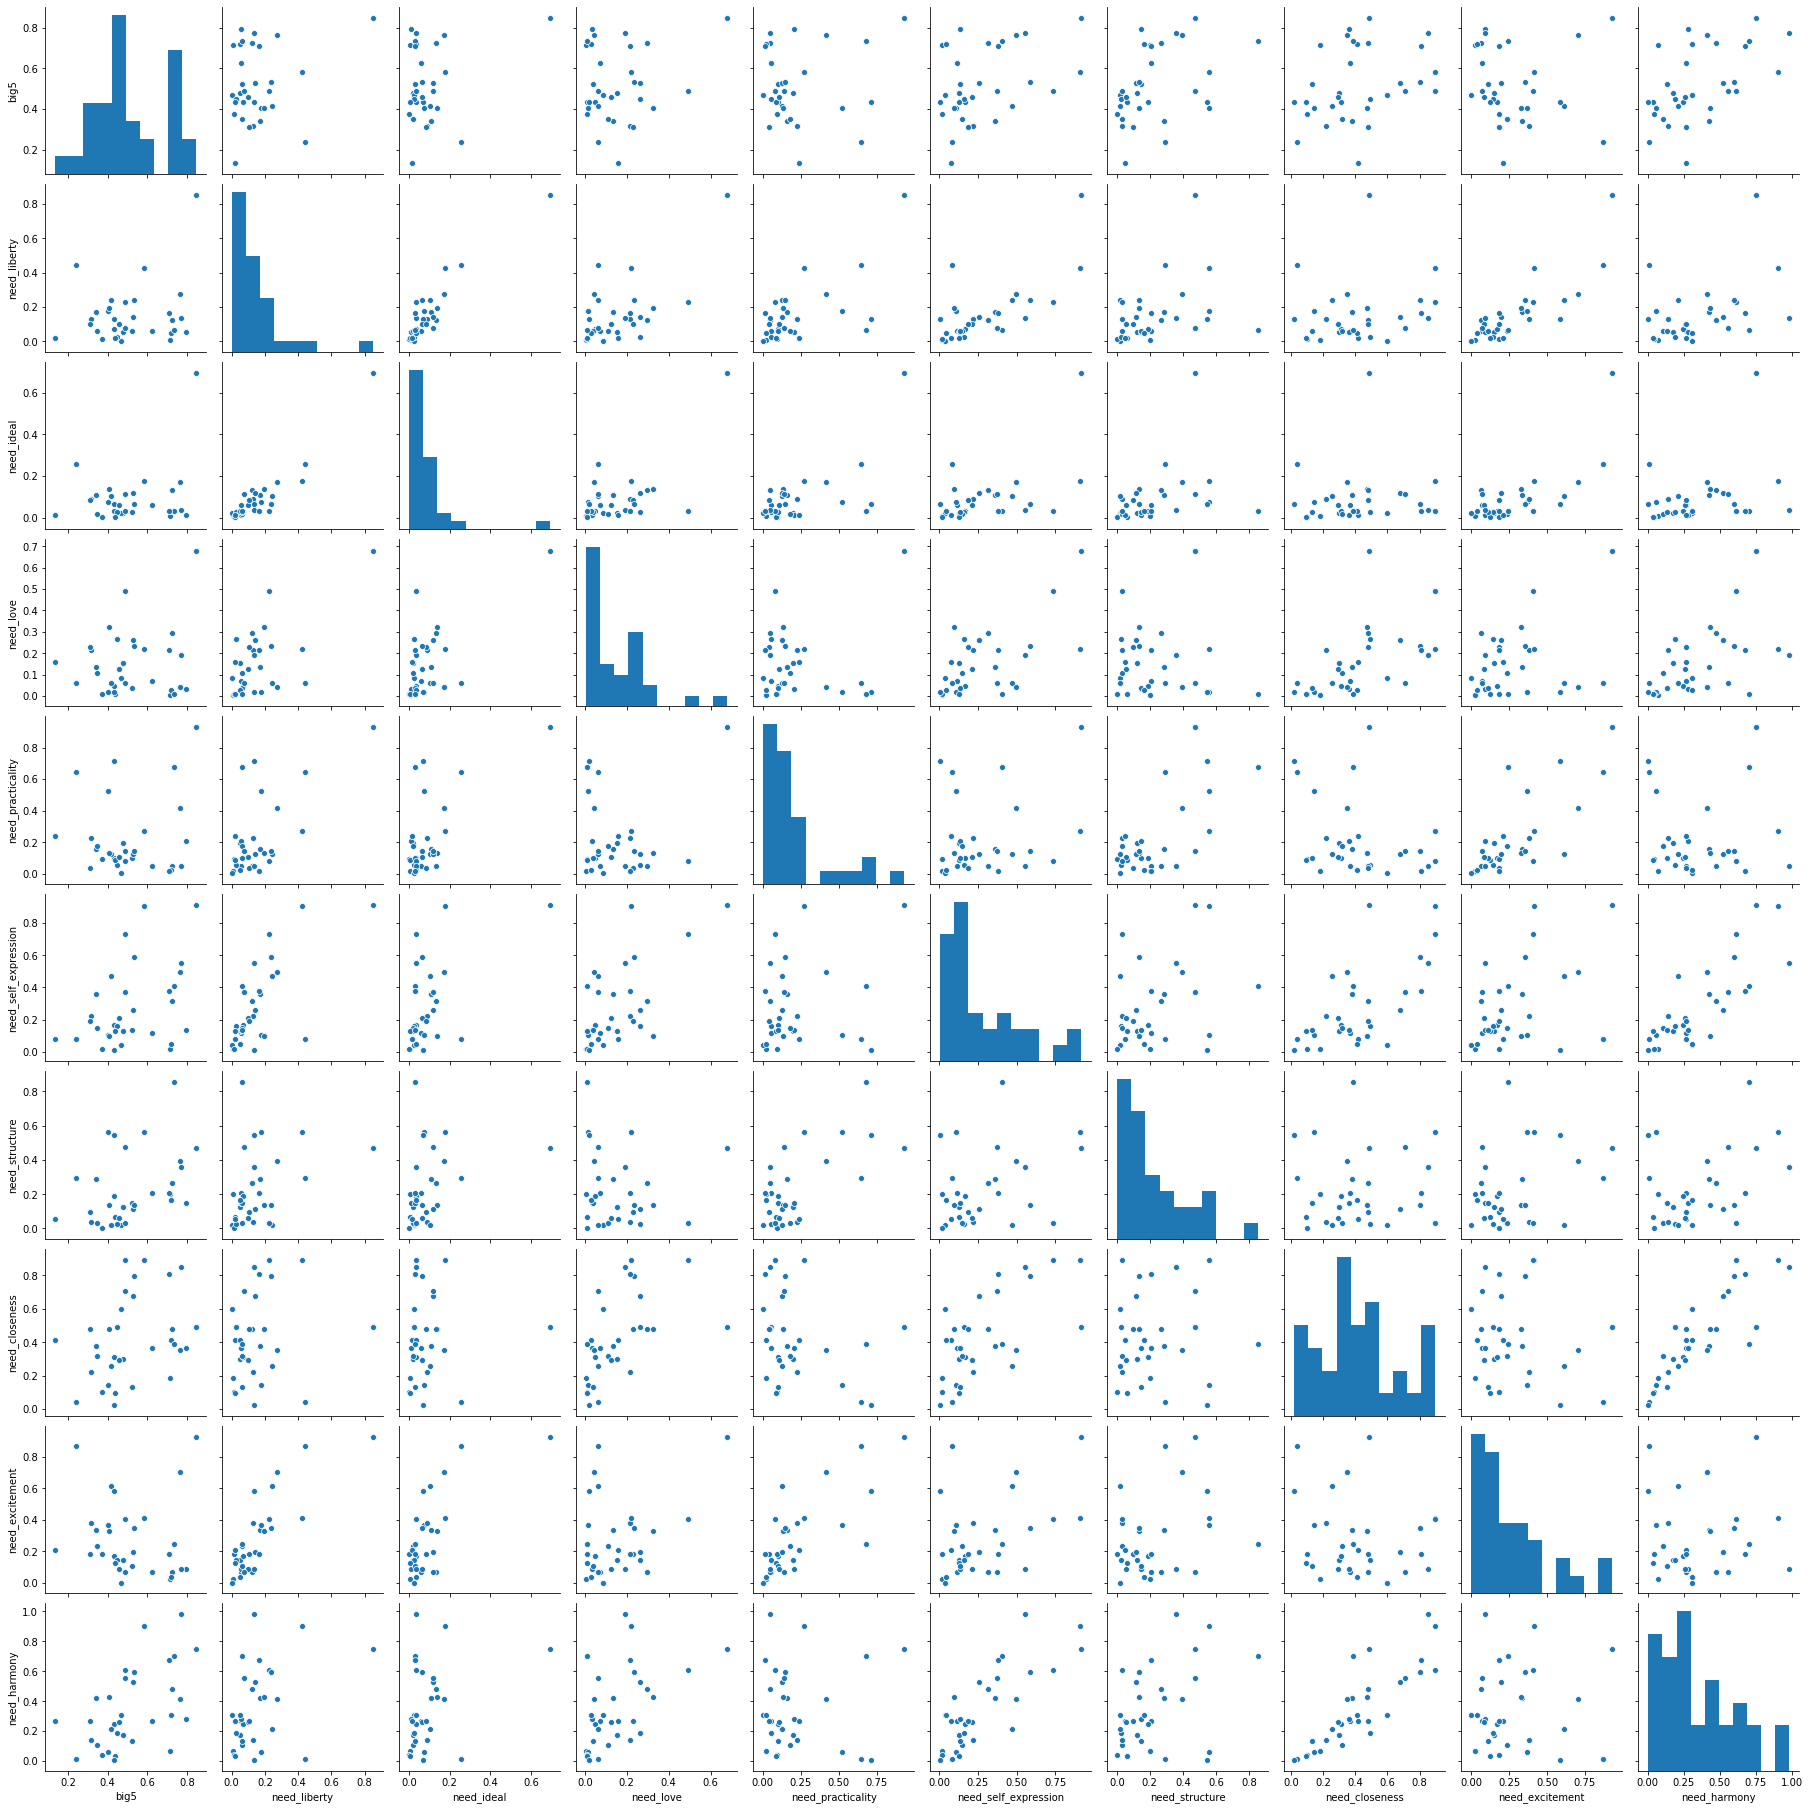

In [118]:
sns.pairplot(harrypotter_links[['big5','need_liberty', 'need_ideal', 'need_love', 'need_practicality', 'need_self_expression', 'need_stability','need_structure', 'need_challenge', 'need_closeness', 'need_curiosity','need_excitement','need_harmony']])

In [132]:
# Null hypothesis: average of the big5 for gryffindor  > = average of big5 
# Alternative hypothesis: average of the big5 for gryffindor  < average of big5 

big5_mean = np.mean(harrypotter_links['big5'])
print(f'The average of everyone big5: {big5_mean}')
stat, pval = stats.ttest_1samp(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5'].values, 161.5)
print(f'The p-value is: {pval/2}.')
print('With 95% certainty we can say that the average of gryffindors is not equal to average of everyone')

stats.t.interval(0.95, len(harrypotter_links['big5'])-1, loc=np.mean(harrypotter_links['big5']), scale=stats.sem(harrypotter_links['big5']))

The average of everyone big5: 0.514667227643812
The p-value is: 1.475043440057747e-54.
With 95% certainty we can say that the average of gryffindors is not equal to average of everyone


(0.45219305302652274, 0.5771414022611013)

In [137]:
#find out the average interval with 95% confidence for each house for big5 score
#gryffindor
mean = harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for gryffindor:\n lower", lower,"\n upper",upper)


The confidence interval for gryffindor:
 lower 0.4130334805698959 
 upper 0.5865025054854384


In [180]:
#find out the average interval with 95% confidence for each house for different big5 score
#agreeableness
mean = harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_agreeableness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_agreeableness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for gryffindor aggreeableness:\n lower", lower,"\n upper",upper)

The confidence interval for gryffindor aggreeableness:
 lower 0.5117362861305992 
 upper 0.7942456609193318


In [181]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_conscientiousness
mean = harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_conscientiousness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_conscientiousness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for gryffindor conscientiousness:\n lower", lower,"\n upper",upper)

The confidence interval for gryffindor conscientiousness:
 lower 0.2632216818097428 
 upper 0.5338367653979135


In [182]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_extraversion
mean = harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_extraversion'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_extraversion'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for gryffindor extraversion:\n lower", lower,"\n upper",upper)

The confidence interval for gryffindor extraversion:
 lower 0.1517205206045803 
 upper 0.38831335551301427


In [165]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_openness
mean = harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_openness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Gryffindor']['big5_openness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for gryffindor openess:\n lower", lower,"\n upper",upper)

The confidence interval for gryffindor openess:
 lower 0.5808986653836423 
 upper 0.774171008462512


In [138]:
#ravenclaw
mean = harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw:
 lower 0.38733578178856864 
 upper 0.6172671486505111


In [167]:
#find out the average interval with 95% confidence for each house for different big5 score
#agreeableness
mean = harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_agreeableness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_agreeableness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw aggreeableness:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw aggreeableness:
 lower 0.7034195739476026 
 upper 0.9103466363775448


In [168]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_conscientiousness
mean = harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_conscientiousness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_conscientiousness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw conscientiousness:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw conscientiousness:
 lower 0.08270114370837678 
 upper 0.5749607308718907


In [169]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_extraversion
mean = harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_extraversion'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_extraversion'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw extraversion:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw extraversion:
 lower 0.014217350630296166 
 upper 0.1851208979488406


In [171]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_openness
mean = harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_openness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Ravenclaw']['big5_openness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw openess:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw openess:
 lower 0.6027291859284831 
 upper 0.9449162023432849


In [139]:
#hufflepuff
mean = harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for hufflepuff:\n lower", lower,"\n upper",upper)

The confidence interval for hufflepuff:
 lower 0.7204247840728861 
 upper 0.776746071626782


In [173]:
#find out the average interval with 95% confidence for each house for different big5 score
#agreeableness
mean = harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_agreeableness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_agreeableness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for hufflepuff aggreeableness:\n lower", lower,"\n upper",upper)

The confidence interval for hufflepuff aggreeableness:
 lower 0.6855592882938182 
 upper 0.8369822253398844


In [174]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_conscientiousness
mean = harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_conscientiousness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_conscientiousness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for hufflepuff conscientiousness:\n lower", lower,"\n upper",upper)

The confidence interval for hufflepuff conscientiousness:
 lower 0.8358221474623984 
 upper 0.9404484539410312


In [177]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_extraversion
mean = harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_extraversion'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_extraversion'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for hufflepuff extraversion:\n lower", lower,"\n upper",upper)

The confidence interval for hufflepuff extraversion:
 lower 0.32960201467885153 
 upper 0.7915668823132046


In [179]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_openness
mean = harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_openness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Hufflepuff']['big5_openness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for ravenclaw openess:\n lower", lower,"\n upper",upper)

The confidence interval for ravenclaw openess:
 lower 0.6426130313916407 
 upper 0.9260893793778435


In [140]:
#slytherin
mean = harrypotter_links[harrypotter_links['House']=='Slytherin']['big5'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Slytherin']['big5'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for slytherin:\n lower", lower,"\n upper",upper)

The confidence interval for slytherin:
 lower 0.38118672290693545 
 upper 0.6112956096608028


In [172]:
#find out the average interval with 95% confidence for each house for different big5 score
#agreeableness
mean = harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_agreeableness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_agreeableness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for slytherin aggreeableness:\n lower", lower,"\n upper",upper)

The confidence interval for slytherin aggreeableness:
 lower 0.5072246629822382 
 upper 0.8255339705268395


In [175]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_conscientiousness
mean = harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_conscientiousness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_conscientiousness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for slytherin conscientiousness:\n lower", lower,"\n upper",upper)

The confidence interval for slytherin conscientiousness:
 lower 0.12263097342010246 
 upper 0.5466533083865981


In [176]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_extraversion
mean = harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_extraversion'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_extraversion'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for slytherin extraversion:\n lower", lower,"\n upper",upper)

The confidence interval for slytherin extraversion:
 lower 0.06927781625871454 
 upper 0.31920062231780083


In [178]:
#find out the average interval with 95% confidence for each house for different big5 score
#big5_openness
mean = harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_openness'].mean()
scale = stats.sem(harrypotter_links[harrypotter_links['House']=='Slytherin']['big5_openness'].values)
lower,upper = stats.norm.interval(0.95,loc = mean,scale = scale)
print("The confidence interval for slytherin openess:\n lower", lower,"\n upper",upper)

The confidence interval for slytherin openess:
 lower 0.6420407514838307 
 upper 0.9373672248948288


In [148]:
#read twitter data
twitter = pd.read_csv('analisis.csv')
twitter.head(10)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7
7,andykusnetzoff,31.865118,16.588110,55.377559,36.258346,7.464646,66.2835,5
8,andyroddick,46.393488,25.451163,39.930310,16.658062,8.452791,145.1473,7
9,andy_murray,39.436667,26.135303,32.966288,32.291591,10.956591,177.5606,7


In [149]:
#drop the last two columns as its not in need for the data analisis
twitter = twitter.drop(['wordcount','categoria'] ,axis=1)

In [150]:
twitter.head()
twitter.set_index('usuario')

,op,co,ex,ag,ne
usuario,,,,,
3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575
aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406
albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979
AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231
alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968
...,...,...,...,...,...
XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221
XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583
xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935


In [151]:
#divide the column to see scores in percentile
twitter['op'] = twitter['op'].div(100)
twitter['co'] = twitter['co'].div(100)
twitter['ex'] = twitter['ex'].div(100)
twitter['ag'] = twitter['ag'].div(100)
twitter['ne'] = twitter['ne'].div(100)
twitter.head()

,usuario,op,co,ex,ag,ne
0,3gerardpique,0.342980,0.281488,0.419488,0.293703,0.098416
1,aguerosergiokun,0.449868,0.205259,0.379389,0.242791,0.103624
2,albertochicote,0.417339,0.137454,0.389999,0.346455,0.088370
3,AlejandroSanz,0.403772,0.153775,0.523375,0.310822,0.050322
4,alfredocasero1,0.366647,0.196423,0.485308,0.311389,0.073060


In [152]:
#drop columns not in need
twitter['big5'] = twitter.loc[:,['op','co','ex','ag','ne']].mean(axis=1)
twitter['big5']

0      0.287215
1      0.276186
2      0.275923
3      0.288413
4      0.286565
         ...   
135    0.280867
136    0.295543
137    0.268184
138    0.288611
139    0.297867
Name: big5, Length: 140, dtype: float64

In [160]:
twitter[twitter['big5'] >  0.3]['big5'].values
#so none falls into any house lets just find the confidence interval for each big5

array([0.30580992, 0.30780649, 0.30059544, 0.30773326, 0.31281969,
       0.3026363 , 0.30076441, 0.30368123, 0.30276984, 0.30189551])

In [ ]:
dialogue = harrypotter['Dialogue'].groupby(harrypotter['Character']).unique().apply(pd.Series)
dialogue

In [ ]:
#creating separate dataframe for each character
char_list = ['HARRY']

dialogue_list = []

#creates separate df for each char
for char in char_list:
	char_df = harrypotter[harrypotter['Character'] == char] 
#get all dialogue and add it together to make one dialogue for book1
dialogue = ' '.join(char_df['Dialogue'].values) 
dialogue_list.append(dialogue)
dialogue_list
pd.DataFrame(dialogue_list)	

In [ ]:
#join the dialogues together
dialogue['Dialogue'] = dialogue[dialogue.columns[0:]].apply( lambda x: ' '.join(x.dropna().astype(str)),axis=1)
# Remove all columns between column index 1 to 645 
dialogue.drop(dialogue.iloc[:, 0:952], inplace = True, axis = 1) 
dialogue